# Challenge:

We are required to to create a portfolio with a good risk-adjusted return profile. We suggested the **Sortino ratio** - this is a measure of the **downside deviation** instead of the whole standard deviation.

The Sortino ratio is said to be a variation of the Sharpe ratio, and is a measure of risk-adjusted returns. I think we should calculate both ratios and see how they trend.


*What is a Sortino ratio? What is the calculation for said ratio?*

*What is a downside deviation? How is this calculated? Presumably, downside deviation is used to calculate the Sortino ratio.*


### Initial thoughts:

We have some idea of how to implement ratio calculations through prior knowledge gained at AlgoTradingSoc, but if we find a suitable, reputable Python library suitable for our purposes, we can use this instead.

### Steps to follow

The overarching idea of this task, and the steps we need to take are as follows:


-   First we need to convert the csv files into dataframes, presumably we will use pandas for this
-   Calculate the Sortino ratios of all the shares
-   Then we should construct a graph, probably matplotlib to observe the Sortino ratios
-   Select an arbritrary amount of top performers in the Sortino ratios, and use an algorithm to calculate the mean Sortino ratio of various portfolios, output a CSV file with the portfolio that has the greatest mean Sortino ratio.

### Future Ideas

- Create a secondary algorithm to determine the best way to utilise the portfolio, so we can use unlimited companies to spend a minimum of 0.001% on.
- Experiment with different metrics, rather than just the mean Sortino ratios.

In [314]:
# Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [315]:
# set directory path
directory = "/Users/kesh/Desktop/uni/AlgoSoc/BlackRock/Algothon2023/universe"

# create empty list to store dataframes
dfs = []

# loop through csv files in directory and read them into dataframes
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        ticker = filename[:-4] # remove .csv extension from filename
        df.columns = ['Date', ticker] # label columns with ticker
        df = df.set_index('Date') # label rows with dates
        dfs.append(df)

# concatenate dataframes into one dataframe
df = pd.concat(dfs, axis=1, join='inner')

df


,GRD,EEWF,PIT,PHG,LVP,IJM,VKM,NLHS,PTDE,YSMW,...,APQ,PAKH,OSD,MIH,HXE,ZPG,HBK,CNMO,BYJ,CMRX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,97.843417,44.955194,24.533109,65.885681,75.341624,64.032964,116.597293,120.402303,56.021946,124.827287,...,41.153268,82.248237,122.645054,49.298044,315.225644,127.106864,128.510599,146.550074,241.405075,58.978466
2018-01-03,98.025637,45.002297,24.810185,65.535385,74.833526,65.002483,116.828920,122.894699,56.395367,124.125534,...,41.403621,82.172424,125.089711,50.765780,310.999651,124.220766,128.403133,148.606466,245.961251,59.247344
2018-01-04,96.752150,45.036689,24.851298,64.642176,74.569841,64.751834,116.255635,122.085828,54.981352,123.764176,...,41.100373,81.141951,124.416785,49.484395,319.148190,122.288091,125.976171,147.529965,246.798039,58.858756
2018-01-05,97.004171,45.250880,24.909552,65.328523,74.463089,64.521407,115.275362,123.182778,54.962658,127.154873,...,41.460241,81.617733,123.194535,50.299046,313.852284,124.763512,125.844478,149.273710,241.775219,59.594661
2018-01-08,98.343070,45.258272,24.979097,64.726307,74.347607,64.924960,114.905070,123.653605,55.527380,123.941602,...,41.915577,81.512581,122.874424,51.154988,314.514284,124.346704,129.537054,145.405581,249.787557,59.345982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,168.513071,56.775923,25.107955,99.733797,73.247142,89.486347,187.540096,407.378883,113.539802,157.323800,...,64.226280,99.525961,145.162954,83.702492,563.923667,280.455552,437.718344,236.093104,366.319597,74.223036
2022-12-27,169.792189,57.776392,25.402983,101.084254,72.927657,90.120686,189.236300,406.848212,110.351667,159.699225,...,63.712386,100.263858,144.880918,81.600978,566.722132,283.283271,445.407293,239.796610,368.145255,73.914338
2022-12-28,169.336113,56.706952,25.428842,99.568569,72.218675,88.711188,187.878233,405.458703,109.093333,158.106884,...,63.779943,99.796393,142.662355,81.333474,570.196344,273.408282,444.457218,237.649349,362.421878,72.331143


We have now retrieved all the csv values from the universe directory and concatenated them into a dataframe. Next step is to calculate the Sortino and Sharpe ratios. To do this, calculate the downside deviation! The downside deviation is a calculation of downside risk, which we derive from the following equation:

In [316]:
# function to calculate annual return rates

def annual_return_rates(start_dates, end_dates, ticker, df):

    results = []

    for n in range(len(start_dates)):
        start_value = df.loc[start_dates[n]][ticker]
        end_value = df.loc[end_dates[n]][ticker]
        result = (end_value-start_value) / start_value
        results.append(result)

    return results

In [317]:
# Testing our ARR function

start_dates = ["2018-01-02", "2019-01-02", "2020-01-02", "2021-01-04", "2022-01-03"]
end_dates = ["2018-12-31", "2019-12-31", "2020-12-31", "2021-12-31", "2022-12-30"]

annual_return_rates(start_dates, end_dates, 7, df)

/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/1866676457.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_value = df.loc[start_dates[n]][ticker]
/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/1866676457.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = df.loc[end_dates[n]][ticker]


[0.26502955525196525,
 0.1083350351300055,
 0.21392257522546784,
 0.5465052517300574,
 0.310146989015078]

In [318]:
# Finding the target downside deviation

negs = [result for result in results if result < 0]
negs = np.square(negs)

negs

array([2.05954762e-05, 6.21161923e-05, 6.94989257e-04, 2.68846108e-04,
       3.32335625e-05, 2.53639297e-04, 1.02104219e-03, 2.51652816e-04])

In [319]:
# calculate the sortino ratio for each asset: from corporate finance institute article
sortino_values = []
count = 0

for ticker in range(1, 500):


    results = annual_return_rates(start_dates, end_dates, ticker, df)
    average_return = np.average(results) # numerator
    negs = [result for result in results if result < 0]
    negs = np.square(negs)
    downside_deviation = np.sum(negs) / len(results)

    if downside_deviation != 0:
        sortino = average_return / np.sqrt(downside_deviation)
    else:
        count += 1
    sortino_values.append(sortino)

print(count)


    
    

/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/1866676457.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_value = df.loc[start_dates[n]][ticker]
/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/1866676457.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = df.loc[end_dates[n]][ticker]


34


### Dilemma

It was here that we came up against our biggest obstacle when developing our algorithm. This was that the downside deviation for some of the stocks were 0, as they hadn't gone through a drop in returns in any years from 2018-2022. This meant that the Sortino ratio alone isn't suitable to aid our decision making in selecting the best stocks for our client's portfolio.

Having discussed with a BlackRock representative, we came to realise that the issue lied with the fact we only have 5 years' worth of data, and need to use daily return rates instead of annual to calculate the downward deviation and Sortino ratio.

In [322]:
# Function to calculate DRRs, and tested

def periodic_return_rates(df, ticker):

    results = []
    dates = df.index.to_numpy()


    for n in range(0, len(dates) - 1, 30):
        current_value = df.loc[dates[n]][ticker]
        next_value = df.loc[dates[n+1]][ticker]
        result = (current_value-next_value) / next_value
        results.append(result)
    
    return results

periodic_return_rates(df, ticker)

/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/2980387872.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_value = df.loc[dates[n]][ticker]
/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/2980387872.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_value = df.loc[dates[n+1]][ticker]


[-0.004538223906819517,
 -0.011793064809455306,
 0.02813420404711661,
 -0.00415494051255012,
 -0.0008166933496309537,
 -0.011069368778099236,
 0.00519902565938544,
 -0.050176527739409574,
 0.015913848907424505,
 0.000599815840550794,
 -0.007881382639261985,
 0.004955304796715007,
 0.001133611694448423,
 -0.011880589176133306,
 0.013275976847853005,
 -0.012939142878674604,
 0.01809077021014627,
 0.005645265994252702,
 0.04613403498899845,
 -0.015333656757373648,
 -0.005764855805476485,
 -0.008760761100188834,
 0.007058397021335326,
 -0.008829081752042079,
 -0.01632724531159848,
 0.0007726480661675878,
 -0.0018864802744656874,
 -0.0043715571104285976,
 0.018666742684065804,
 0.022191797095507105,
 -0.01592605716678754,
 0.0056406333277320645,
 -0.024450487614039947,
 -0.008637726759597376,
 0.004767708860986577,
 -0.0030091111844416157,
 0.0012907364197793589,
 0.0007693558496634504,
 0.006375262706641617,
 0.05008902998514202,
 -0.015863568817070815,
 -0.002434471880299888]

In [356]:
# calculate the sortino ratio for each asset: from corporate finance institute article
sortino_values = []
average_returns = []
downside_deviations = []

for ticker in range(1, 500):


    results = periodic_return_rates(df, ticker)
    average_return = np.average(results) # numerator
    negs = [result for result in results if result < 0]
    negs = np.square(negs)
    downside_deviation = np.sum(negs) / len(results)
    sortino = average_return / np.sqrt(downside_deviation)
    sortino_values.append(sortino)
    average_returns.append(average_return)
    downside_deviations.append(np.sqrt(downside_deviation))

sortino_values

/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/2980387872.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_value = df.loc[dates[n]][ticker]
/var/folders/0h/2j8z84z94z1105kxs623l6wm0000gn/T/ipykernel_4757/2980387872.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_value = df.loc[dates[n+1]][ticker]


[1.3010934496721056,
 0.30902455660009304,
 -0.1469578856204352,
 0.24072839278758412,
 0.522659763009826,
 -0.06989874325458245,
 0.19556286585266366,
 0.18912246624658555,
 0.18960558156824178,
 0.1285756282581072,
 -0.06893362535327333,
 -0.03571541600966325,
 0.39278938122997104,
 -0.10993392822583216,
 -0.11826727861410972,
 -0.1316947499833327,
 0.15756393330361684,
 0.03790189313417327,
 0.31313266841386556,
 -0.015384943422627619,
 0.4711471862021081,
 0.01567625425771196,
 0.545377958003194,
 -0.08901989613183922,
 0.009115418825299686,
 0.2867579961455081,
 0.14191178527338896,
 0.37212796077191407,
 0.16816930809297898,
 0.07874173225978395,
 -0.2003288880615181,
 0.661675154562307,
 -0.002991002833037864,
 0.08679148991635385,
 0.10964506366403663,
 0.44280152436967474,
 0.5223705228077238,
 0.25798928823957595,
 0.13355322595344765,
 0.31150436500610607,
 0.48030184323713204,
 0.24267727364071867,
 -0.15682764650748246,
 0.05075147134954584,
 0.14501386237031902,
 -0.13344

In [355]:
tickers = list(df.columns.values)
print(tickers)
print(sortino_values)

ticker_sortino_dict = dict(zip(tickers, sortino_values))
print(ticker_sortino_dict)

['GRD', 'EEWF', 'PIT', 'PHG', 'LVP', 'IJM', 'VKM', 'NLHS', 'PTDE', 'YSMW', 'NWRJ', 'ZDX', 'MKKC', 'ZEK', 'UPFR', 'TFH', 'MBLN', 'XRW', 'NRWC', 'IRZM', 'INKB', 'VSJ', 'EFFL', 'OHU', 'OHB', 'WHYV', 'UREJ', 'CKSV', 'QNF', 'PDE', 'XJSZ', 'JSOV', 'RDP', 'VCNK', 'YYF', 'BMV', 'YWO', 'NVQ', 'WNVJ', 'ESV', 'QHKP', 'BUG', 'YBN', 'VDSR', 'AGW', 'OJH', 'TMNC', 'NIOP', 'DAS', 'ZHO', 'SJDX', 'JLL', 'HTH', 'TEF', 'THV', 'XHL', 'DYT', 'NENO', 'KSDM', 'DTD', 'YMW', 'NLI', 'SUQK', 'LXN', 'VDHY', 'BYFU', 'XDDH', 'HLNP', 'DDAR', 'PRX', 'ITYW', 'LKWC', 'CZFL', 'GHDI', 'OLAR', 'YYTX', 'BUU', 'IIP', 'IGZR', 'AKF', 'AGE', 'FDWM', 'SZQ', 'ZGE', 'CDJ', 'GPAQ', 'POHV', 'KVUE', 'VEV', 'UWUR', 'HNU', 'NNS', 'IOYA', 'PHW', 'KIVZ', 'YYUJ', 'RHBV', 'BCY', 'LNDP', 'ZPVU', 'SBJI', 'WGDU', 'DXRA', 'DZJR', 'SBIP', 'VCNO', 'MFAH', 'BUA', 'PGM', 'PQYY', 'YDOW', 'TKJ', 'JNXJ', 'AZDB', 'IEWC', 'MYZP', 'XRD', 'STNO', 'NEUC', 'ORI', 'YDNR', 'RWVC', 'ZANL', 'TBPM', 'DSTK', 'IVZL', 'EDO', 'DSOA', 'XAVX', 'UFLX', 'WVC', 'GYW', '

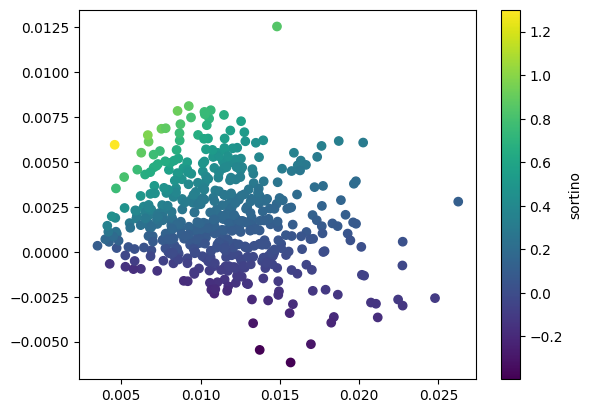

In [360]:
fig, ax = plt.subplots()

sc = ax.scatter(downside_deviations, average_returns, c=sortino_values)
fig.colorbar(sc, label="sortino")
plt.show()

From the graph above, we can see that a lower downside deviation and a higher return results in a better Sortino ratio, and they are inversely proportional, so companies that get higher returns are also more likely to be less risky.

In [386]:
def select_portfolio(df, N):
    
    sorted_dict = dict(sorted(ticker_sortino_dict.items(), key=lambda item: item[1], reverse=True)) 
    top_tickers = list(sorted_dict.keys())[:N]
    total_sortino = sum(sorted_dict[ticker] for ticker in top_tickers)
    
    weights = {}
    for ticker in top_tickers:
        weight = sorted_dict[ticker] / total_sortino
        weights[ticker] = weight
    
    expected_returns = {}
    for ticker in top_tickers:
        results = periodic_return_rates(df, ticker)
        expected_return = np.average(results)
        expected_returns[ticker] = expected_return
    
    total_expected_return = sum(weights[ticker] * expected_returns[ticker] for ticker in top_tickers)
    
    weight_sum = sum(weights.values())
    normalized_weights = {ticker: round(weight / weight_sum * 100, 3) for ticker, weight in weights.items()}
    
    return normalized_weights, round(total_expected_return * (1258 / 30), 3)

select_portfolio(df, 1)

({'GRD': 100.0}, 0.065)

In [396]:
# finding the best portfolios to invest 

max_returns = 0
best_weights = {}

for i in range(30):

    current_weights, current_returns = select_portfolio(df, i)

    if current_returns > max_returns:
        max_returns = current_returns
        best_weights = current_weights

print(best_weights)
print(max_returns)


{'GRD': 13.959, 'VDXA': 10.454, 'EEC': 9.851, 'KSDM': 9.795, 'GKJR': 9.764, 'IND': 9.468, 'ZGWE': 9.464, 'VDHY': 9.413, 'IJZW': 9.089, 'BCFC': 8.742}
0.099


In [398]:
import csv

# create a list of tuples from the dictionary
data = [(ticker, weight) for ticker, weight in best_weights.items()]

# write the data to a csv file
with open('portfolio_weights.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Ticker', 'Weight'])
    for row in data:
        writer.writerow(row)
